In [4]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
t=pd.read_csv("/content/truedata.csv")
f=pd.read_csv("/content/falsedata.csv")
t.head(5)
f.head(5)
t.shape
f.shape

(138, 15)

In [ ]:
print(t.index)
print(f.index)

RangeIndex(start=0, stop=138, step=1)
RangeIndex(start=0, stop=138, step=1)


In [6]:
t["class"]=1
f["class"]=0
print(f.index)
t_testing=t.tail(10)
for i in range(137,127,-1):
  t.drop([i],axis=0,inplace=True)
f_testing=f.tail(10)
for i in range(137,127,-1):
  f.drop([i],axis=0,inplace=True)
testing=pd.concat([f_testing,t_testing],axis=0)
testing.to_csv("m_testing.csv")
data=pd.concat([f,t],axis=0)
data.head(10)

RangeIndex(start=0, stop=138, step=1)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,name,class
0,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0,bindu,0
1,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0,nayani,0
2,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0,pardhu,0
3,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0,nagaraju,0
4,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,hasini,0
5,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0,bhargav,0
6,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0,harini,0
7,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0,nithya,0
8,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0,kavyasri,0
9,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,bindu,0


output
0    128
1    128
Name: age, dtype: int64
0 = Fake news
1 = True news


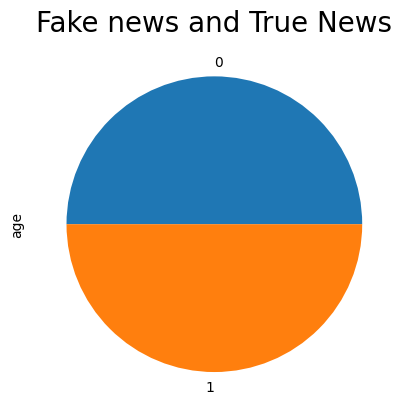

In [7]:
print(data.groupby(['output'])['age'].count())
print("0 = Fake news\n1 = True news")
data.groupby(['output'])['age'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split as ttp
x=data["name"]
y=data["output"]
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy = LR.score(xv_test,y_test).round(2)
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test)
print(classification_report(y_test,pred_LR))

Accuracy is 0.31
              precision    recall  f1-score   support

           0       0.33      0.48      0.39        29
           1       0.29      0.17      0.21        35

    accuracy                           0.31        64
   macro avg       0.31      0.33      0.30        64
weighted avg       0.30      0.31      0.29        64



[[14 15]
 [29  6]]


<Axes: >

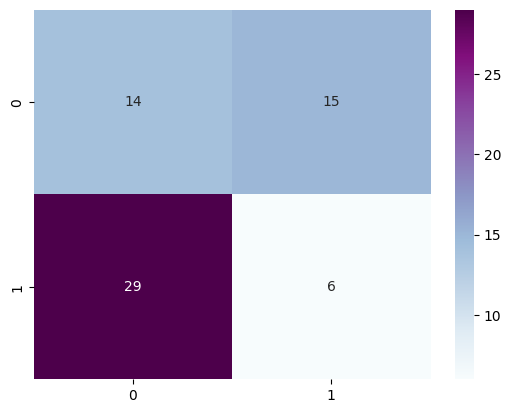

In [11]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)